**Data Science & Business Analytics**

TASK 1

PREDICTION USING SUPERVISED ML

Author : Vishal Simanchal Bhunya

Prediction Statement : What will be the predicted score if a student studies for 9.25 hrs/day?

In this regression task we will predict the percentage of marks that  a student is expected to score based upon the number of hours they studied. 

In [32]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
#Reading data from the given link
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
print('Successfully Data Imported')

Successfully Data Imported


In [34]:
#Showing the first five data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [35]:
#Showing the last five data
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [36]:
data.shape

(25, 2)

In [37]:
#Statistical representation of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Data Visualization**

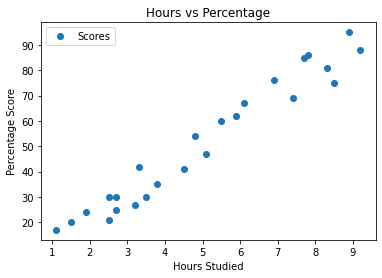

In [38]:
#Plotting the disribution of scores
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the above graph we can see that there is a positive linear relation between the number of hours studied & percentage of score.

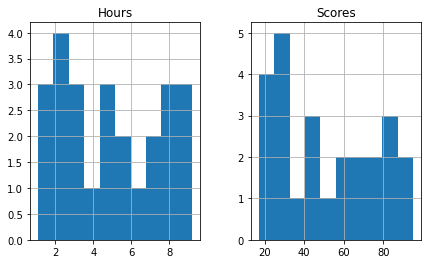

In [39]:
data.hist(figsize = (7,4))
plt.show()

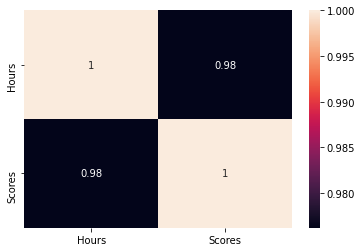

In [40]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr,annot = True)
plt.show()

A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in matrix are represented as colors.

Importing the Machine Learning Scikit_learn built-in libraries

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Preparing the independent and dependent variable.

In [42]:
x = data.drop('Scores', axis = 1)
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [43]:
y = data['Scores']
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

Spliting the data into training set and testing set

In [44]:
#Taking 20% for testing and 80% for training
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [45]:
#Create linear regresion object
linear = LinearRegression()

In [46]:
#Train the model using the training sets
linear.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#Gives the prediction of the train model
linear.coef_

array([9.91065648])

In [48]:
linear.intercept_

2.018160041434662

Plotting the Regression Line

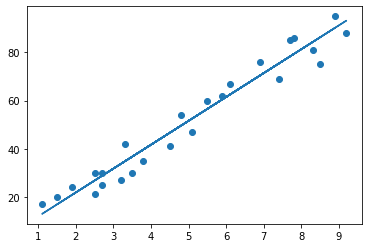

In [49]:
line = linear.coef_ * x + linear.intercept_
plt.scatter(x,y)
plt.plot(x, line)
plt.show()

Making the Predictions

In [50]:
y_pred = linear.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [51]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [52]:
linear.score(x_test, y_test)

0.9454906892105354

**Statement :** What will be the predicted score if a student studies for 9.25 hrs/day?

In [53]:
hours = [[9.25]]
predict_value = linear.predict(hours)
print("No of hours = {}".format(hours))
print("Predicted Score = {}".format(predict_value[0]))

No of hours = [[9.25]]
Predicted Score = 93.69173248737539


**Evaluating the performance of the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [54]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))

Mean Absolute Error :  4.183859899002982


****